In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

I test VADER with a simple sentence to determine initial polarity boundaries using compound result.

In [3]:
a = 'I enjoyed today.'
print(sid.polarity_scores(a))

{'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.5106}


In [4]:
file1 = open('the_windhover.txt', 'r')

pos = 0;
neg = 0;
neu = 0;
lines = 0;
 
# Rating each line
for line in file1:
    b = line.strip()
    score = sid.polarity_scores(b)
    
    if b != "" :
        lines += 1
        print("{}\n {}".format(b, score))
    
        # depending on trends throughout files, I may adjust these markers (0.2 and -0.2)
    
        if score['compound'] >= 0.2 :
            print(" Positive")
            pos += 1
 
        elif score['compound'] <= - 0.2 :
            print(" Negative")
            neg += 1
 
        else :
            print(" Neutral")
            neu += 1

# Closing file(s)
file1.close()

I caught this morning morning's minion, king-
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 Neutral
dom of daylight's dauphin, dapple-dawn-drawn Falcon, in his riding
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 Neutral
Of the rolling level underneath him steady air, and striding
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 Neutral
High there, how he rung upon the rein of a wimpling wing
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 Neutral
In his ecstasy! then off, off forth on swing,
 {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.636}
 Positive
As a skate's heel sweeps smooth on a bow-bend: the hurl and gliding
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 Neutral
Rebuffed the big wind. My heart in hiding
 {'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'compound': -0.296}
 Negative
Stirred for a bird, â€“ the achieve of, the mastery of the thing!
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 Neutral
Brute beauty and val

In [5]:
print(neg, neu, pos)

4 7 3


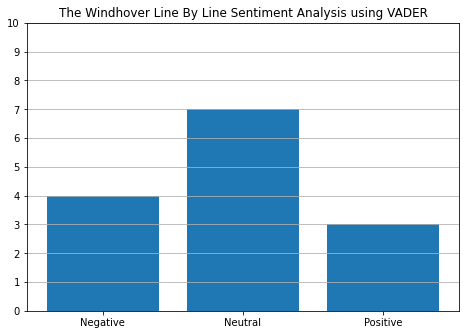

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
lbls = ['Negative', 'Neutral', 'Positive']
compounds = [neg, neu, pos]
ax.bar(lbls, compounds)
ax.set_title('The Windhover Line By Line Sentiment Analysis using VADER')
ax.set_yticks(np.arange(0, 11, 1))
ax.grid(axis='y')
plt.show()

In [7]:
# The following code calculates the net sentiment rate of the poem overall, rather than considering it line by line
file1 = open('the_windhover.txt', 'r')

nsr = np.zeros(lines + 1, dtype=float) # a 1x15 array (0:14 lines)
lines = 0
vec = [0,0,0]; 

for line in file1:
    b = line.strip()
    score = sid.polarity_scores(b)
    
    if b != '' :
        lines += 1
        
        # add polarity scores of all lines to evaluate poem as a whole later
        vec = [vec[0] + score['neg'], vec[1] + score['neu'], vec[2] + score['pos']]
    
        # evaluate poem using net sentiment rate
        nsr[lines] = (vec[2] - vec[0]) / lines
    
# Closing file(s)
file1.close()

In [8]:
print(vec) # the total sum of polarities

[1.045, 11.901, 1.054]


In [9]:
print(nsr[lines]) # the final calculation of net sentiment rate

0.0006428571428571514


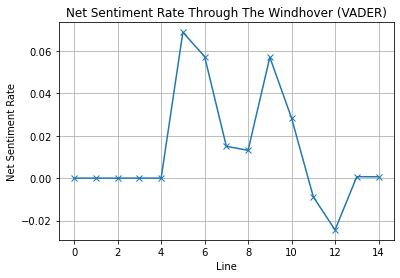

In [10]:
plt.plot(nsr, marker = 'x')
plt.title('Net Sentiment Rate Through The Windhover (VADER)')
plt.xlabel('Line')
plt.ylabel('Net Sentiment Rate')
plt.grid(True)
plt.show()